# Sample Notebook for the Data Analytics Hackathon

* The notebook that you submit **must** run (without *any* errors), and create a `submission.csv` file, in the required format.

* This notebook should serve as a template to your final notebook submission.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

`index_col` helps you to retain the index as provided in the dataset.

In [2]:
train = pd.read_csv(r"/content/train.csv", index_col = 0)
test = pd.read_csv(r"/content/test.csv", index_col = 0)

In [3]:
train.head()

,Date,Open,Close,Volume,Strategy
id,,,,,
0,2015-06-01,66.208486,75.609978,298506300,Hold
1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2015-06-15,47.701942,71.140831,250670900,Buy
3,2015-06-22,54.754816,72.881344,223614300,Hold
4,2015-06-29,48.031899,66.284718,406814900,Buy


In [4]:
test.head()

,Date,Open,Volume
id,,,
0,2021-03-01,72.708331,205897600
1,2021-03-08,73.310886,214095600
2,2021-03-15,70.610119,151601700
3,2021-03-22,70.256017,193982500
4,2021-03-29,68.258324,220238400


In [5]:
import plotly.express as px
fig = px.line(train, x='Date', y="Close")
fig.show()

In [6]:
import plotly.express as px
fig = px.line(train, x='Date', y="Open")
fig.show()

In [7]:
test.describe()
test.isnull().any()

Date      False
Open      False
Volume    False
dtype: bool

In [8]:
train.describe()
train.isnull().any()

Date        False
Open        False
Close       False
Volume      False
Strategy    False
dtype: bool

In [9]:
print(train.shape)
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])
test.set_index(['Date'],inplace=True)
train.set_index(['Date'],inplace=True)

(300, 5)


In [10]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [12]:
from pmdarima.arima import auto_arima

Checking whether time series is stationary or not using ADF

<Axes: xlabel='Date'>

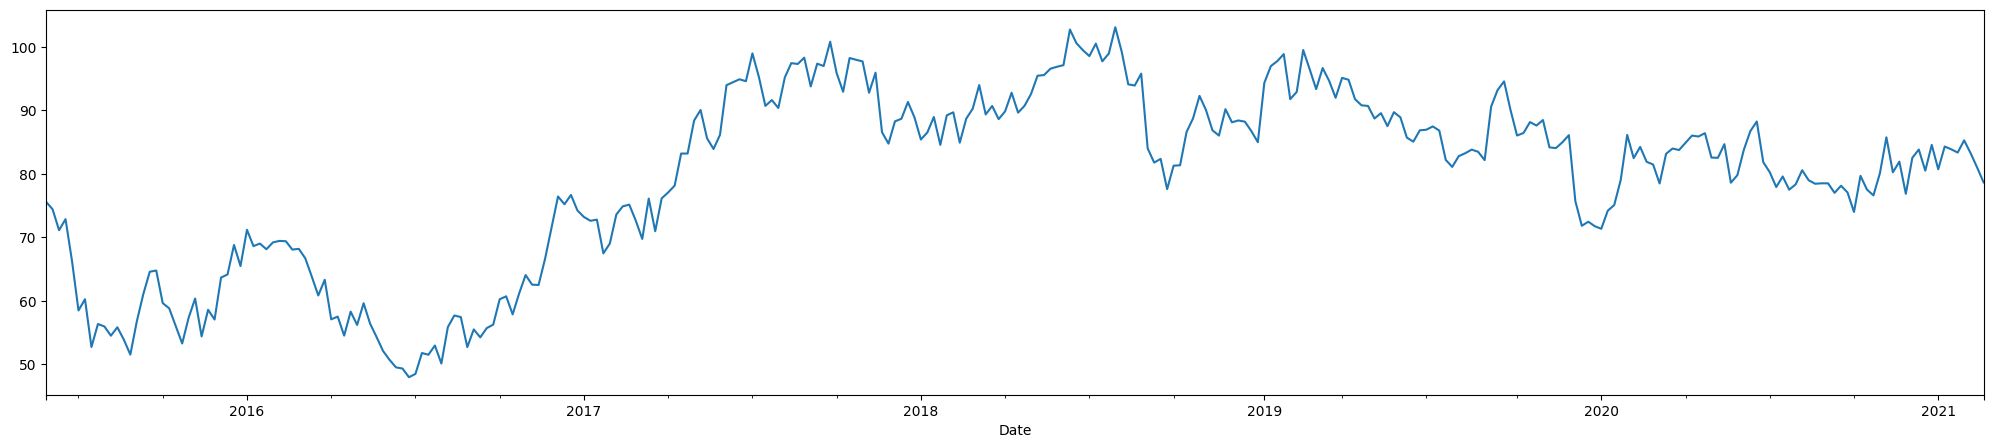

In [13]:
train['Close'].plot(figsize=(25,5))


In [14]:
t = sm.tsa.adfuller(train.Close, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.808006
p-value                          0.376494
#Lags Used                       1.000000
Number of Observations Used    298.000000
dtype: float64

In [15]:
train_ts = train.copy()
train_ts['differenced_values'] = train_ts['Close'].diff(1)
train_ts.dropna(subset=['differenced_values'], inplace=True)
train_ts.head()


,Open,Close,Volume,Strategy,differenced_values
Date,,,,,
2015-06-08,64.116235,74.443331,227974800,Hold,-1.166647
2015-06-15,47.701942,71.140831,250670900,Buy,-3.302500
2015-06-22,54.754816,72.881344,223614300,Hold,1.740512
2015-06-29,48.031899,66.284718,406814900,Buy,-6.596626
2015-07-06,51.374399,58.494017,590857400,Buy,-7.790701


In [16]:
t = sm.tsa.adfuller(train_ts.differenced_values, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                 -19.615948
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    298.000000
dtype: float64

In [17]:
t = sm.tsa.adfuller(train_ts.Open, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.937048
p-value                          0.314838
#Lags Used                       3.000000
Number of Observations Used    295.000000
dtype: float64

In [18]:
train_ts['open_differenced_values'] = train_ts['Close'].diff(1)
train_ts.dropna(subset=['open_differenced_values'], inplace=True)

In [19]:
t = sm.tsa.adfuller(train_ts.open_differenced_values, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                 -19.639021
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    297.000000
dtype: float64

In [20]:
t = sm.tsa.adfuller(train_ts.Volume, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                -6.221523e+00
p-value                        5.209296e-08
#Lags Used                     4.000000e+00
Number of Observations Used    2.930000e+02
dtype: float64

In [21]:
s = sm.tsa.seasonal_decompose(train_ts.Close, period=52)

<Axes: xlabel='Date'>

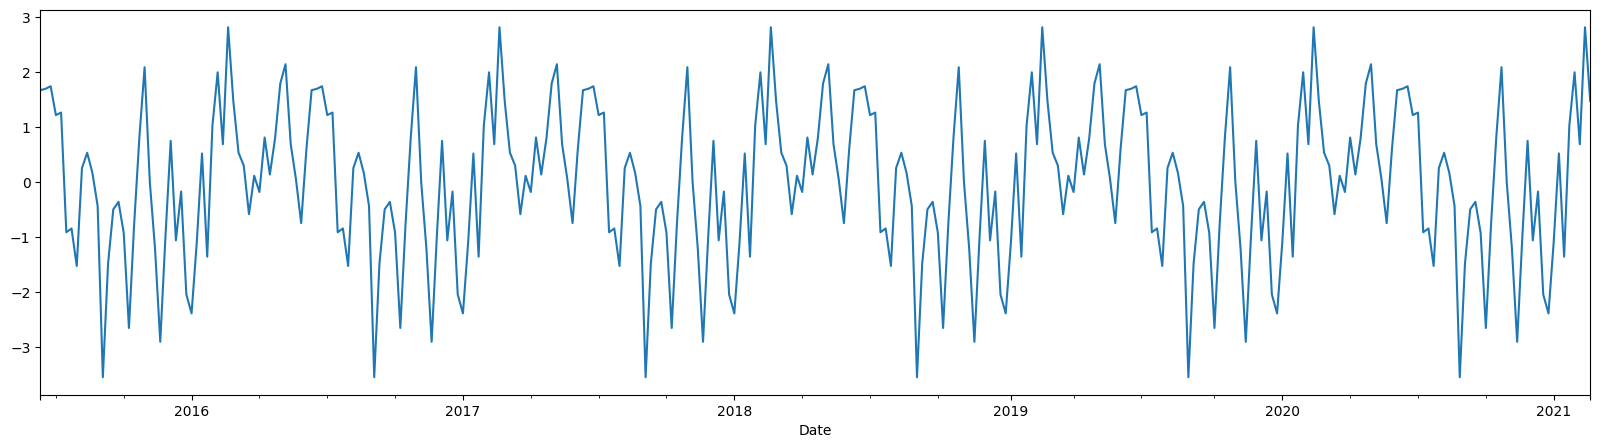

In [22]:
s.seasonal.plot(figsize=(20,5))

<Axes: xlabel='Date'>

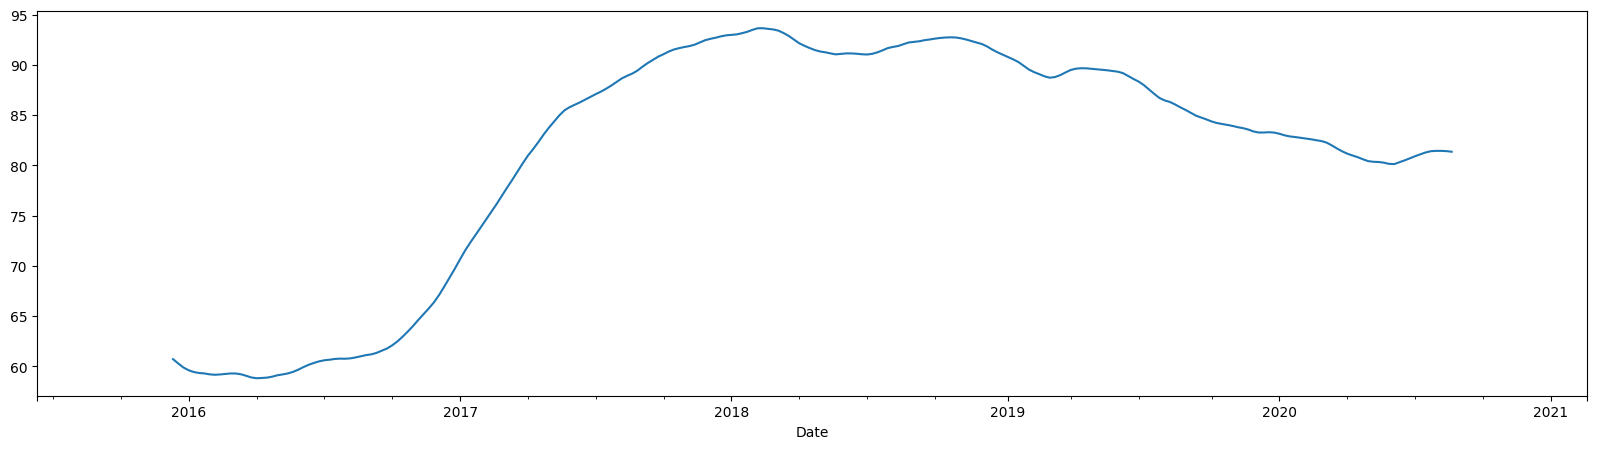

In [23]:
s.trend.plot(figsize=(20,5))

<Axes: xlabel='Date'>

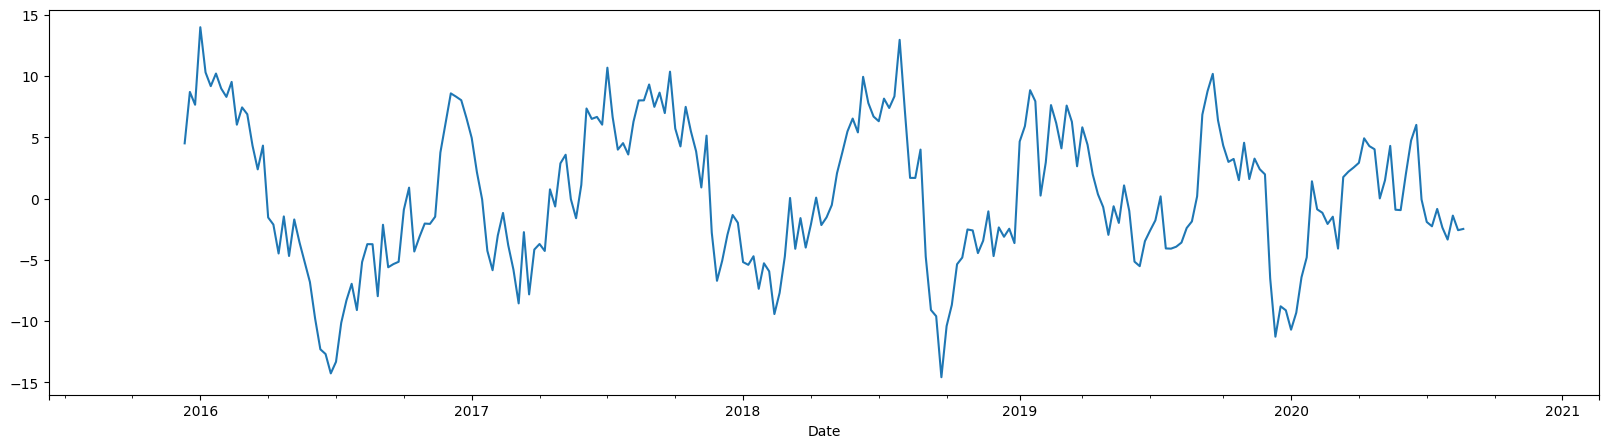

In [24]:
s.resid.plot(figsize=(20,5))

In [25]:
train_ts = train_ts.drop(columns=['Strategy'])

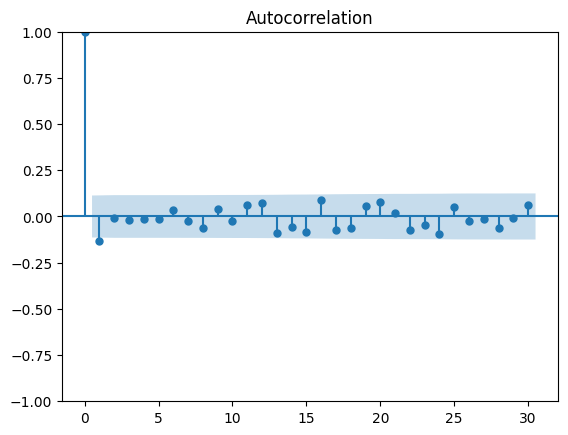

In [26]:
plot_acf(train_ts.differenced_values, lags=30)
plt.show()

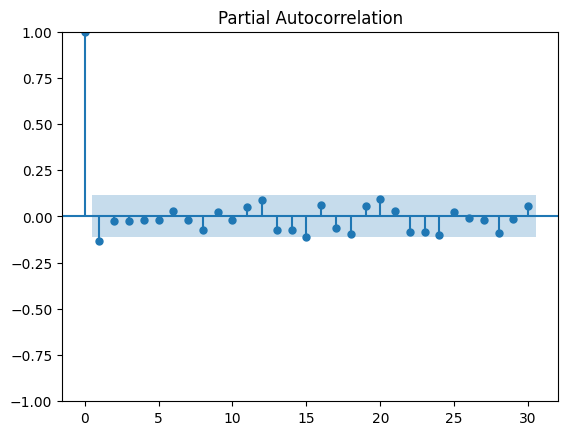

In [27]:
plot_pacf(train_ts.differenced_values, lags=30)
plt.show()

In [28]:
#p=22,q=1,d=1

import warnings
warnings.filterwarnings("ignore")

import itertools
p=range (0,25)
q=range(0,2)
d = range(0,2)
pdq = list(itertools.product (p, d, q))

store = {}
for param in pdq:
       try:
              model_arima = sm.tsa.arima.ARIMA (train_ts.Close, order = param)
              model_arima_fit = model_arima.fit()
              store[param] =  model_arima_fit.aic
              #print(param, model_arima_fit.aic)
       except:
              continue

sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
print(sorted_dict)

{(0, 1, 1): 1544.5020273338864, (1, 1, 0): 1544.7862755104657, (1, 1, 1): 1546.1900623442948, (2, 1, 0): 1546.5106844104507, (2, 1, 1): 1547.1968273488824, (0, 1, 0): 1547.902873550261, (3, 1, 0): 1548.1137401652627, (3, 1, 1): 1549.1895148861909, (4, 1, 0): 1549.9814619208682, (4, 1, 1): 1551.1205453366483, (5, 1, 0): 1551.7694815519637, (1, 0, 1): 1552.6497925963304, (2, 0, 0): 1552.787401283394, (6, 1, 0): 1553.5063184749094, (5, 1, 1): 1553.6503503219337, (2, 0, 1): 1554.5901681043752, (3, 0, 0): 1554.671319648907, (1, 0, 0): 1555.011847694152, (7, 1, 0): 1555.410709789644, (6, 1, 1): 1555.4908177787163, (8, 1, 0): 1555.7497493534097, (4, 0, 0): 1556.4764555091547, (3, 0, 1): 1556.4993568489076, (7, 1, 1): 1557.0132154002983, (8, 1, 1): 1557.3634484237389, (9, 1, 0): 1557.5013400301625, (22, 1, 1): 1557.7678364778117, (24, 1, 0): 1557.833074872513, (5, 0, 0): 1558.4420645014873, (4, 0, 1): 1558.503935270839, (13, 1, 1): 1558.5792616167862, (15, 1, 0): 1558.7684961939326, (20, 1, 0)

In [29]:
endog = train_ts['Close']
exog = sm.add_constant(train_ts[['Open','Volume']])

In [30]:
mod = sm.tsa.ARIMA(endog=endog, exog=exog, order=(2,1,2))
model_fit = mod.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  298
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -767.333
Date:                Wed, 03 Jan 2024   AIC                           1550.665
Time:                        05:49:35   BIC                           1580.215
Sample:                    06-15-2015   HQIC                          1562.495
                         - 02-22-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0   2.17e-10          0      1.000   -4.26e-10    4.26e-10
Open          -0.1093      0.050     -2.165      0.030      -0.208      -0.010
Volume     -2.549e-09   1.65e-09     -1.544      0.123   -5.79e-09    6.87e-10
ar.L1          0.0190      0.026      0.724      0.469      -0.032       0.071
ar.L2         -0.3799      0.026    -14.431      0.000      -0.432      -0.328
ma.L1         -0.1524      0.026     -5.790      0.000      -0.204      -0.101
ma.L2          0.3570      0.027     13.394      0.000       0.305       0.409
sigma2         9.8644      0.000   2.05e+04      0.000       9.863       9.865
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.98   Prob(JB):                         0.55
Heteroskedasticity (H):               0.79   Skew:                            -0.13
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.98e+25. Standard errors may be unstable.
"""

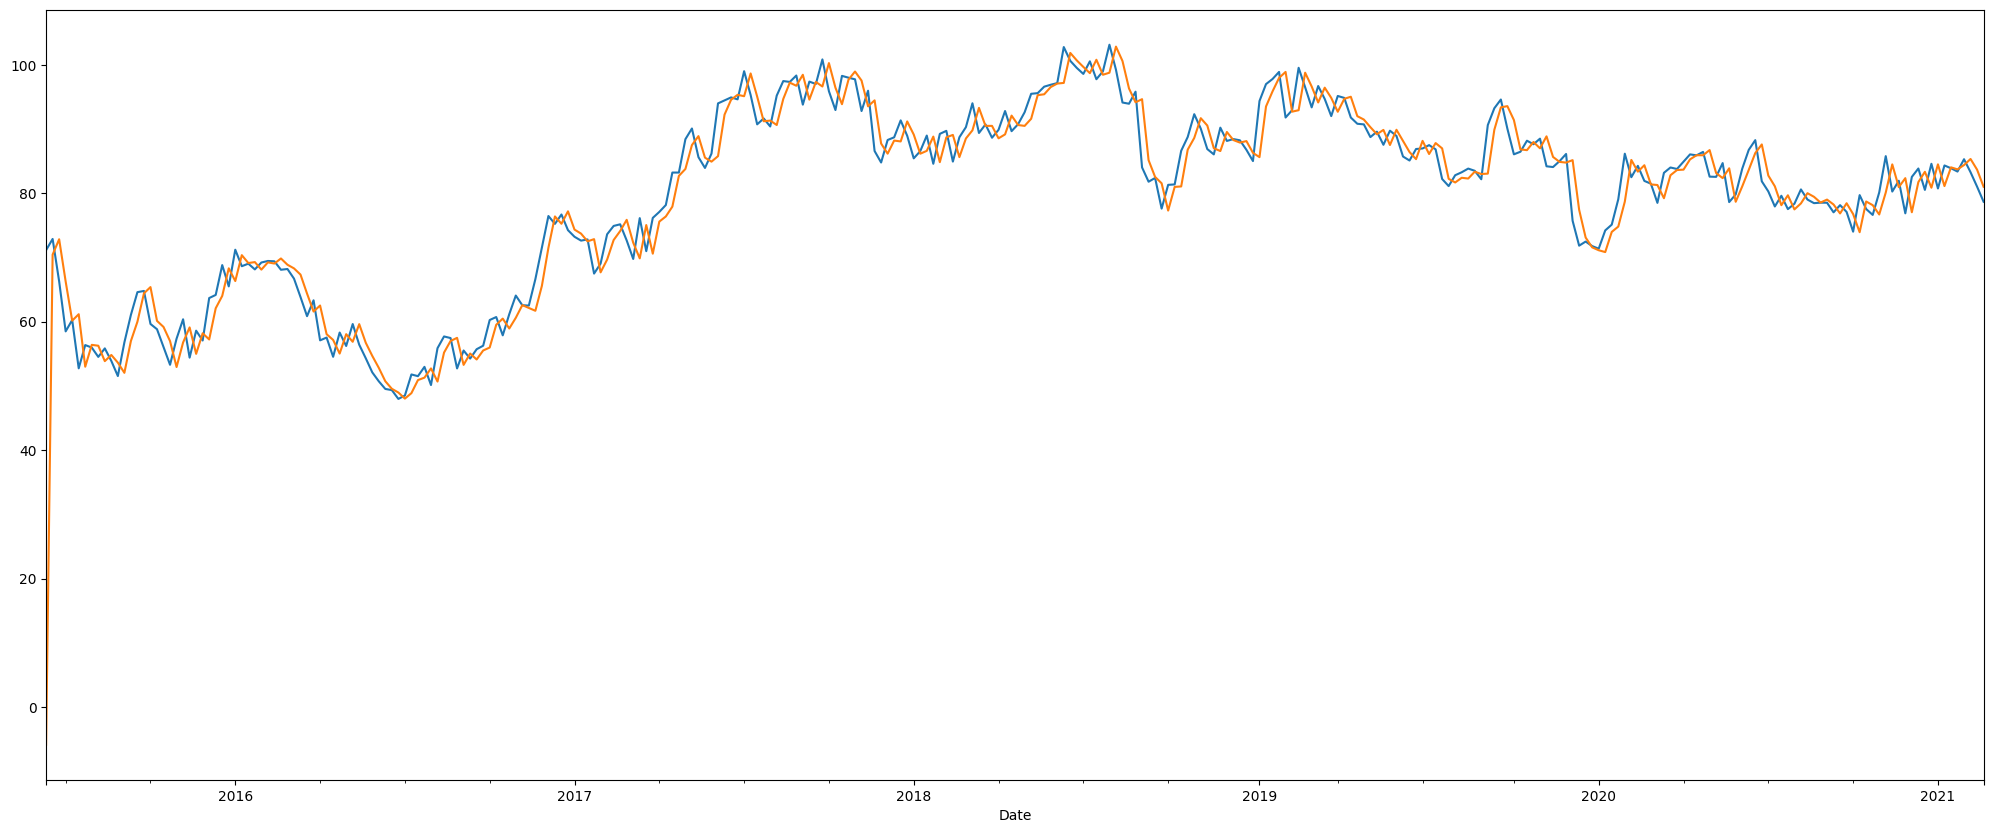

In [31]:
train_ts['Close'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [32]:
train_ts

,Open,Close,Volume,differenced_values,open_differenced_values
Date,,,,,
2015-06-15,47.701942,71.140831,250670900,-3.302500,-3.302500
2015-06-22,54.754816,72.881344,223614300,1.740512,1.740512
2015-06-29,48.031899,66.284718,406814900,-6.596626,-6.596626
2015-07-06,51.374399,58.494017,590857400,-7.790701,-7.790701
2015-07-13,45.851376,60.269347,693570200,1.775330,1.775330
...,...,...,...,...,...
2021-01-25,81.284821,83.373498,117281600,-0.516252,-0.516252
2021-02-01,71.970249,85.294903,177655800,1.921405,1.921405
2021-02-08,71.784627,83.266453,146003500,-2.028450,-2.028450


In [33]:
train_tss = train_ts.iloc[0:240]
test_tss = train_ts.iloc[240:]

# Make predictions
predict = model_fit.predict(start=len(train_tss), end=len(train_tss) + len(test_tss) - 1, exog=sm.add_constant(test_tss[['Open', 'Volume']]))

# Create a new DataFrame to store the predictions
predictionss_df = pd.DataFrame(index=test_tss.index)
predictionss_df['Close'] = test_tss['Close']  # Add the 'Close' values from the test set
predictionss_df['predicted'] = predict.values  # Add the predicted values


In [34]:
predictionss_df

,Close,predicted
Date,,
2020-01-20,75.110591,73.977659
2020-01-27,79.059896,74.808962
2020-02-03,86.154937,78.683323
2020-02-10,82.494413,85.183931
2020-02-17,84.264270,83.356291
2020-02-24,81.916434,84.358829
2020-03-02,81.487762,81.371801
2020-03-09,78.500217,81.280130
2020-03-16,83.179317,79.222231


In [35]:
predictionss_df['error'] = predictionss_df['Close'] - predictionss_df['predicted']
error_list = predictionss_df.error
mean_absolute_error = sum(abs(error) for error in error_list) / len(error_list)
mean_absolute_error

2.344436969618902

In [36]:
smape = np.mean(np.abs(predictionss_df['predicted'] - predictionss_df['Close']) / (np.abs(predictionss_df['predicted']) + np.abs(predictionss_df['Close'])))


In [37]:
smape

0.014445097823272707

In [38]:
train.head()

,Open,Close,Volume,Strategy
Date,,,,
2015-06-01,66.208486,75.609978,298506300,Hold
2015-06-08,64.116235,74.443331,227974800,Hold
2015-06-15,47.701942,71.140831,250670900,Buy
2015-06-22,54.754816,72.881344,223614300,Hold
2015-06-29,48.031899,66.284718,406814900,Buy


In [39]:
train_ts.head()
train_ts.shape

(298, 5)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [41]:
strategy_mapping = {"Hold": 0, "Buy": 1, "Sell": 2}
original = train['Strategy'].tolist()
train["Strategy"] = train["Strategy"].map(strategy_mapping)

# Select features
features = ["Close", "Open", "Volume"]
X = train[features]
y = train["Strategy"]

# Create and train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Make predictions on the validation set
y_pred = clf.predict(X)


res = []
for i in y_pred:
    res.append(i)

for i in range(len(res)):
    if res[i] == 0:
        res[i] = 'Hold'

    elif res[i] == 1:
        res[i] = 'Buy'

    elif res[i] == 2:
        res[i] = 'Sell'

train['Strategy_Predicted'] = res
train['Strategy'] = original

display(train)

,Open,Close,Volume,Strategy,Strategy_Predicted
Date,,,,,
2015-06-01,66.208486,75.609978,298506300,Hold,Hold
2015-06-08,64.116235,74.443331,227974800,Hold,Hold
2015-06-15,47.701942,71.140831,250670900,Buy,Buy
2015-06-22,54.754816,72.881344,223614300,Hold,Hold
2015-06-29,48.031899,66.284718,406814900,Buy,Buy
...,...,...,...,...,...
2021-01-25,81.284821,83.373498,117281600,Sell,Sell
2021-02-01,71.970249,85.294903,177655800,Sell,Sell
2021-02-08,71.784627,83.266453,146003500,Hold,Hold


In [42]:
# test.reset_index(inplace = True)
# test = test.drop('level_0', axis=1)
test = test.rename(columns={'index': 'id'})
test.head()

,Open,Volume
Date,,
2021-03-01,72.708331,205897600
2021-03-08,73.310886,214095600
2021-03-15,70.610119,151601700
2021-03-22,70.256017,193982500
2021-03-29,68.258324,220238400


In [43]:
test_tss

,Open,Close,Volume,differenced_values,open_differenced_values
Date,,,,,
2020-01-20,82.002162,75.110591,134102500,0.898562,0.898562
2020-01-27,81.211918,79.059896,186548400,3.949305,3.949305
2020-02-03,79.468382,86.154937,217464300,7.095040,7.095040
2020-02-10,80.441650,82.494413,161707700,-3.660524,-3.660524
2020-02-17,75.858197,84.264270,159078600,1.769857,1.769857
2020-02-24,79.041822,81.916434,114791900,-2.347837,-2.347837
2020-03-02,84.564855,81.487762,160941500,-0.428672,-0.428672
2020-03-09,85.854679,78.500217,155132100,-2.987545,-2.987545
2020-03-16,82.670511,83.179317,125932700,4.679099,4.679099


In [44]:
# test_tss['Date'] = test['Date']
# test_tss['id'] = test['id']
# test_tss
# test_tss = test.drop('Date', axis = 1)
# test_tss = test.drop('id', axis = 1)
# test_tss.reset_index(inplace = True)
# test_tss
# test_tss
predict_test = model_fit.predict(start = 1, end=len(test) , exog=sm.add_constant(test[['Open', 'Volume']]))
# predict_test
test['Close'] = predict_test.values
test

,Open,Volume,Close
Date,,,
2021-03-01,72.708331,205897600,70.438721
2021-03-08,73.310886,214095600,72.836190
2021-03-15,70.610119,151601700,66.251491
2021-03-22,70.256017,193982500,60.160211
2021-03-29,68.258324,220238400,61.166917
...,...,...,...
2022-12-26,57.048622,224994700,77.912353
2023-01-02,60.569661,176020500,82.699443
2023-01-09,61.446777,181478600,83.775754


In [45]:

X_test = test[features]
y_pred_test = clf.predict(X_test)

res=[]
for i in y_pred_test:
    res.append(i)

for i in range(len(y_pred_test)):
    if res[i] == 0:
        res[i] = 'Hold'

    elif res[i] == 1:
        res[i] = 'Buy'

    elif res[i] == 2:
        res[i] = 'Sell'


test['Strategy'] = res

display(test)

columns_to_store = ["id", "Date", "Close", "Strategy"]
# columns_to_store = ["Close", "Strategy"]

data_to_store = test[columns_to_store]

# Define the filename for the new CSV file
output_filename = "submission.csv"

# Save the selected data to a new CSV file
data_to_store.to_csv(output_filename, index=False)

final_csv = pd.read_csv('submission.csv')
display(final_csv)


,Open,Volume,Close,Strategy
Date,,,,
2021-03-01,72.708331,205897600,70.438721,Hold
2021-03-08,73.310886,214095600,72.836190,Buy
2021-03-15,70.610119,151601700,66.251491,Hold
2021-03-22,70.256017,193982500,60.160211,Sell
2021-03-29,68.258324,220238400,61.166917,Sell
...,...,...,...,...
2022-12-26,57.048622,224994700,77.912353,Hold
2023-01-02,60.569661,176020500,82.699443,Sell
2023-01-09,61.446777,181478600,83.775754,Sell


KeyError: ignored